<a href="https://colab.research.google.com/github/pablocontini/Taller-de-Procesamiento-de-Datos/blob/main/TPS01_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado

**Regresión Lineal**

En el mercado de smartphones, los dispositivos con mayor capacidad de almacenamiento suelen tener baterías más duraderas. Modelar estos datos podría ayudar a estimar la duración de la batería en función de su capacidad de almacenamiento, algo útil para los consumidores a la hora de elegir un nuevo dispositivo. Sea $X$ la capacidad de almacenamiento de los smartphones (en TB) e $Y$ la duración de su batería (en días), con densidad de probabilidad conjunta de la forma:
$$ p_{X,Y}\left(x,y\right) = \frac{3}{4} \cdot 𝟙 \left\{0 < y < 1 + x^2, 0 < x < 1\right\}$$

(a) *Soluciones óptimas:*
  
  1. Calcular la esperanza condicional.
  2. Calcular el error bayesiano.
  3. Calcular la recta de regresión.

Ayuda: Las únicas integrales que debe resolver son con respecto a la marginal $p_X(x)$. El resto de los cálculos debe hacerse utilizando propiedades.

(b) *Simulación:* Utilizando $\texttt{random.uniform}$ (numpy), generar un dataset de 500 pares de muestras.

Ayuda:Truncada de uniforme es uniforme y simular truncadas es intuitivo.

(c) *Regresión Lineal:*

  1. Implementar una regresión lineal (matricial) a partir de los datos generados previamente. El código debe estar estructurado de la siguiente manera:


```python
class regresion_lineal:
    # Opcional, para inicializar atributos o declarar hiperparámetros
    def __init__(self,...

    # Etapa de entrenamiento
    def fit(self, X, y):

    # Etapa de testeo
    def predict(self, X):
```
  2. Entrenar la regresión lineal con el dataset generado anteriormente.
  3. Utilizar el regresor para predecir la duración de una batería de 356GB.

(d) *Comparación*: Graficar en una misma figura (pyplot) el soporte, la esperanza, la esperanza condicional, la recta de regresión (teórica) y la regesión lineal hallada.

(e) Repetir el inciso (c) utilizando gradiente descendiente.

# Soluciones óptimas

## Esperanza condicional


La esperanza condicional $\mathbb{E}\left[ Y \mid X = x\right]$ representa el valor promedio esperado de la duración de la batería, $Y$, dado que se se conoce el valor específico de la capacidad de almacenamiento, $X$.

Es el mejor estimador en el sentido del menor error cuadrático medio. Es decir, cualquier otra estimación $\hat{Y} = \varphi(X)$ inevitablemente produce un error cuadrático medio mayor o igual a $\mathbb{E}\left[ Y \mid X = x\right]$.

Por definición, se expresa como:
$$\mathbb{E}\left[ Y \mid X = x\right] = \int_{-\infty}^\infty y\, p_{Y \mid X} \left(y \mid x\right) \mathrm{d}y$$
A su vez, la densidad condicional de $Y$ dado $X=x$ se define como:
$$p_{Y \mid X} (y \mid x)=\frac{p_{X, Y}\left(x, y\right)}{p_X(X)}$$
A continuación, se determinan las distribuciones necesarias para llevar a cabo el cálculo.

> **Marginal $p_X(x)$**: <br>
Dada la densidad conjunta
$$ p_{X, Y}\left(x, y\right) = \frac{3}{4} \cdot 𝟙 \left\{0 < y < 1 + x^2, 0 < x < 1\right\}$$
la densidad marginal de $X$ se obtiene integrando sobre todos los valores de $y$:
$$p_X\left(x\right)=\int_{-\infty}^{\infty} p_{X, Y}\left(x, y\right) \mathrm{d}y$$
Debido a la función indicadora $ 𝟙 \left\{0 < y < 1 + x^2\right\}$, el intervalo de integración se reduce a $[0,1 + x^2]$, así:
$$p_X\left(x\right)=\int_{0}^{1 + x^2} \frac{3}{4} \mathrm{d}y = \frac{3}{4}\Bigl[ y\Bigr]_0^{1 + x^2}=\frac{3}{4}\left(1 + x^2\right)$$
Esto es válido únicamente para $0 < x < 1$, fuera de ese intervalo, la densidad es cero. En forma compacta:
$$p_X\left(x\right)=\frac{3}{4}\left(1 + x^2\right) \cdot 𝟙 \left\{0 < x < 1\right\}$$

> **Condicional  $p_{Y \mid X} (y \mid x)$**: <br>
Usando las expresiones de la densidad conjunta y la marginal se obtiene:
$$p_{Y \mid X} (y \mid x) = \frac{\frac{3}{4}}{\frac{3}{4}\left(1 + x^2\right)}=\frac{1}{1 + x^2} \cdot 𝟙 \left\{0 < y < 1 + x^2\right\}$$
Es decir, condicionado a $X=x$ (con $0 < x < 1)$, la variable $Y \mid X = x$ está uniformemente distribuida en el intervalo $\left(0,1 + x^2\right)$

> **Esperanza condicional $\mathbb{E}\left[Y\mid X = x\right]$** <br>
Dado que $Y \mid X = x \sim \mathcal{U}\left(0, 1 + x^2\right)$, su esperanza se puede calcular a partir de la conocida media de una distribución uniforme ($X\sim\mathcal{U}\left(a, b\right)\rightarrow\mathbb{E}\left[X\right]=\left(a+b\right)/2$):
$$\mathbb{E}\left[Y\mid X = x\right] = \frac{\left(0\right) + \left(1 + x^2\right)}{2}=\frac{1 + x^2}{2}$$

En resumen, la esperanza condicional de $Y$ dado $X = x$ es:
$$\boxed{\mathbb{E}\left[Y\mid X = x\right] =\frac{1 + x^2}{2}, \text{ para }0 < x < 1}$$



## Error bayesiano

El error bayesiano representa la incertidumbre mínima que queda sobre la duración de la batería, aún cuando se conoce exactamente la capacidad de almacenamiento $X=x$. Éste no se puede reducir, ni siquiera con la predicción óptima $\mathbb{E}\left[Y \mid X = x\right]$.

El error bayesiano mide la dispersión promedio de $Y$ alrededor de su esperanza condicional, sobre todos los valores posibles de $X$.

Su expresión surge de evaluar el riesgo del estimador óptimo y es:
$$\mathbb{E}\left[\text{Var}\left(Y \mid X\right)\right]$$

>En el contexto del problema, $Y\mid X \sim \mathcal{U}\left(0,1+x^2\right)$, por lo tanto su varianza se puede calcular a partir de la expresión conocida de una distribución uniforme ($X\sim\mathcal{U}\left(a, b\right)\rightarrow\text{Var}\left(X\right)=\left(b-a\right)^2/2$):
\begin{align}
\text{Var}\left(Y\mid X\right) = \frac{\left[\left(1+x^2\right) - \left(0\right)\right]^2}{12}=\frac{\left(1+x^2\right)^2}{12}=\frac{1+2x^2+x^4}{12}
\end{align}

>Aplicando el operador esperanza y utilizando la propiedad de linealidad se obtiene:
\begin{align}
\mathbb{E}\left[\text{Var}\left(Y\mid X\right)\right] = \mathbb{E}\left[\frac{1+2\,X^2+X^4}{12}\right]=\frac{1}{12}\left(\mathbb{E}\left[1\right]+2\,\mathbb{E}\left[X^2\right]+\mathbb{E}\left[X^4\right]\right)
\end{align}

>En general, el valor de $\mathbb{E}\left[X^k\right]$ es:
$$\mathbb{E}\left[X^k\right]=\int_0^1 x^k\,p_X(x)\mathrm{d}x=\int_0^1 x^k\,\frac{3}{4}\left(1+x^2\right)\mathrm{d}x=\frac{3}{4}\left[\frac{x^{k+1}}{k+1}+\frac{x^{k+3}}{k+3}\right]_0^1=\frac{3}{4}\left[\frac{1}{k+1}+\frac{1}{k+3}\right]$$

>Reemplazando en la expresión anterior y sumando:
\begin{align}
\mathbb{E}\left[\text{Var}\left(Y\mid X\right)\right] = \frac{1}{12}\left[1+2\frac{3}{4}\left(\frac{1}{3}+\frac{1}{5}\right)+\frac{3}{4}\left(\frac{1}{5}+\frac{1}{7}\right)\right]=\frac{6}{35} \end{align}

Por lo tanto, el error bayesiano es
$$\boxed{\mathbb{E}\left[\text{Var}\left(Y\mid X\right)\right] =\frac{6}{35}\simeq 0.17143}$$


## Recta de regresión

La recta de regresión es la mejor línea recta para predecir la duración de la batería, $Y$, en función del almacenamiento, $X$. Es una aproximación lineal de la verdadera relación, que es no lineal.

Su expresión surge de encontrar $a$ y $b$ que minimicen el error cuadrático medio respecto de $Y$, es decir:
$$min_{a,b}\mathbb{E}\left[\left(Y-\left(a+bX\right)\right)^2\right]$$

El resultado es:
$$\hat{Y}=a + b\,X, \;\;\; b = \frac{\text{Cov}\left(X, Y\right)}{\text{Var}\left(x\right)}, \;\;\; a = \mathbb{E}\left[Y\right] - b\,\mathbb{E}\left[X\right]$$

>**Esperanza $\mathbb{E}\left[X\right]$**: <br>
De la expresión general obtenida en el punto anterior resulta:
$$\mathbb{E}\left[X\right] = \frac{3}{4}\left(\frac{1}{2} + \frac{1}{4}\right)=\frac{9}{16}$$

>**Esperanza $\mathbb{E}\left[Y\right]$**: <br>
Por la ley de la esperanza total se puede escribir:
$$\mathbb{E}\left[Y\right]=\mathbb{E}\left[\mathbb{E}\left[Y\mid X\right]\right]$$
Pero $\mathbb{E}\left[Y\mid X\right]$ fue hallada en el primer punto, por lo tanto:
$$\mathbb{E}\left[Y\right]=\mathbb{E}\left[\frac{1+X^2}{2}\right]$$
Por linealidad del operador esperanza:
$$\mathbb{E}\left[Y\right]=\frac{1}{2}\left(1+\mathbb{E}\left[X^2\right]\right)$$
Nuevamente, utilizando la expresión general del punto anterior:
$$\mathbb{E}\left[X^2\right] = \frac{3}{4}\left(\frac{1}{3} + \frac{1}{5}\right)=\frac{2}{5}$$
Reemplazando:
$$\mathbb{E}\left[Y\right]=\frac{1}{2}\left(1+\frac{2}{5}\right)=\frac{7}{10}$$

>**Varianza $\text{Var}\left(X\right)$**: <br>
Por definición, la varianza de $X$ es:
$$\text{Var}\left(X\right) = \mathbb{E}\left[\left(X-\mathbb{E}\left[X\right]\right)^2\right] = \mathbb{E}\left[X^2\right] - \left(\mathbb{E}\left[X\right]\right)^2$$
Reemplazando los valores de $\mathbb{E}\left[X\right]$ y $\mathbb{E}\left[X^2\right]$ obtenidos anteriormente:
$$\text{Var}\left(X\right) = \frac{2}{5}-\left(\frac{9}{16}\right)^2=\frac{107}{1280}$$

>**Covarianza $\text{Cov}\left(X, Y\right)$**: <br>
Por definición, la covarianza entre $X$ e $Y$ es:
\begin{align}
  \text{Cov}\left(X, Y\right) &= \mathbb{E}\left[\left(X-\mathbb{E}\left[X\right]\right)\left(Y-\mathbb{E}\left[Y\right]\right)\right]= \mathbb{E}\left[X\,Y\right] - \mathbb{E}\left[X\right]\,\mathbb{E}\left[Y\right]\\
\end{align}
Resta obtener $\mathbb{E}\left[X\,Y\right]$. Por la ley de la esperanza total se puede escribir:
$$\mathbb{E}\left[XY\right]=\mathbb{E}\left[\mathbb{E}\left[XY\mid X\right]\right]$$
Aplicando linealidad al interior:
$$\mathbb{E}\left[XY\right]=\mathbb{E}\left[X\mathbb{E}\left[Y\mid X\right]\right]$$
Reemplazando $\mathbb{E}\left[Y\mid X\right]$ por la expresión obtenida en el primer punto:
$$\mathbb{E}\left[XY\right]=\mathbb{E}\left[X\left(\frac{1+X^2}{2}\right)\right]$$
Relizando el producto y aplicando linealidad del operador esperanza:
$$\mathbb{E}\left[XY\right]=\frac{1}{2}\left(\mathbb{E}\left[X\right]+\mathbb{E}\left[X^3\right]\right)$$
Nuevamente, mediante la expresión general del punto anterior:
$$\mathbb{E}\left[X^3\right]=\frac{3}{4}\left(\frac{1}{4}+\frac{1}{6}\right)=\frac{5}{16}$$
Reemplazando $\mathbb{E}\left[X\right]$ y $\mathbb{E}\left[X^3\right]$:
$$\mathbb{E}\left[XY\right]=\frac{1}{2}\left(\frac{9}{16} + \frac{5}{16}\right)=\frac{7}{16}$$
Por lo tanto, la covarianza es:
$$\text{Cov}\left(X, Y\right)=\frac{7}{16}-\frac{9}{16}\frac{7}{10}=\frac{7}{160}$$

Por último, los coeficientes de la recta son:
\begin{align}
b&=\frac{Cov\left(X,Y\right)}{Var\left(X\right)}=\frac{\frac{7}{160}}{\frac{107}{1280}}=\frac{56}{107}\\
a&=\mathbb{E}[Y] - b\,\mathbb{E}[X] = \frac{7}{10} - \frac{56}{107}\frac{9}{16}=\frac{217}{535}
\end{align}

Y la recta de regresión es:
$$\boxed{\hat{Y}=\frac{217}{535}+\frac{56}{107}\,X\simeq 0.40561 + 0.52336\,X}$$

# Simulación

Se propone generar un dataset de 500 pares de muestras utilizando $\texttt{random.uniform}$ (numpy).

En la distribución propuesta, $\Omega=\left\{\left(x, y\right): 0 < x < 1, 0 < y < 1 + x^2\right\}$, la cota superior de $y$ depende de $x$. Por lo tanto, no se puede usar directamente $\texttt{np.random.uniform}$ para muestrear $\left(x, y\right)$ en esa región, ya que ésta genera muestras independientes en intervalos fijos de la forma $\left[a, b\right]\times \left[c, d\right]$, no en una región con límites variables (dependientes de otra coordenada).


Una manera de lograrlo es en primer lugar generar $X\sim\mathcal{U}\left(0, 1\right)$ y luego, dado $X=x$ generar $Y\sim\mathcal{U}\left(0, 1 + x^2\right)$, ya sea mediante un bucle "para cada $x$, $\texttt{np.random.uniform(0, 1 + x**2)}$:
```python
def sample_loop(N):
    """
    Genera N pares (X, Y) por medio de un bucle.
    """
  # 1) Simular X ~ U(0, 1)
  X = np.random.uniform(low=0, high=1, size=N)
  # 2) Para cada x, simular Y ~ U(0, 1 + x^2)
  Y = np.array([np.random.uniform(0, 1 + x**2) for x in X])
  return X, Y
```
o, de manera vectorial, escalando $Y$ por $1 + X^2$.
```python
def sample_vec(N):
    """
    Genera N pares (X, Y) de manera vectorial.
    """
  # 1) Simular X ~ U(0, 1)
  X = np.random.uniform(low=0, high=1, size=N)
  # 2) Para cada x, simular Y ~ U(0, 1 + x^2)
  Y = np.random.uniform(0, 1, size=N) * (1 + X**2)
  return X, Y
```

Otra manera, la recomendada en clase, es notando que $0 < y < 1 + x^2 \leq 2$, generar $(x^\ast, y^\ast)$ en $\left[0, 1\right]\times \left[0, 2\right]$ y luego aceptar las muestras solo si $y^\ast < 1 + \left(x^\ast\right)^2$.

El área de $\Omega$ es $\int_0^1\left(1 + x^2\right)\mathrm{d}x=4/3$. La caja total tiene área $2$. Entonces la tasa de acpetación es $\frac{4/3}{2}=\frac{2}{3}$. En otras palabras, se rechaza aproximadamente un 33\% de las muestras.

In [ ]:
def sample_rejection(N):
    """
    Genera N pares (X, Y) usando rechazo en la caja [0,1]x[0,2].
    """
    out_X = []
    out_Y = []

    while len(out_X) < N:
        X = np.random.uniform(0, 1, 2 * N)
        Y = np.random.uniform(0, 2, 2 * N)

        mask = (Y < (1 + X**2))
        # Aceptados
        out_X = X[mask]
        out_Y = Y[mask]

    return (out_X[:N], out_Y[:N])


In [ ]:
# 1) Número de muestras
N = 500

# 2) Generar el dataset
X, Y = sample_rejection(N)

# Regresión Lineal

## Implementación

Como se mencionó anteriormente, la función que minimiza el riesgo esperado es la esperanza condicional. Sin embargo, en la práctica, esta distribución conjunta no se conoce y se recurre a aproximaciones utilizando datos de entrenamiento.

Como no es posible calcular directamente la esperanza condicional, se minimiza el riesgo empírico, que no es más que el promedio de la función costo en una muestra de entrenamiento de $n$ observaciones.
$$\text{Riesgo empírico}: \frac{1}{n}\sum_{i=1}^n\ell \left(X_i, Y_i\right)=\frac{1}{n}\sum_{i=1}^n\left(Y_i-\varphi(X_i)\right)^2$$
De este modo, el problema se formula como:
$$\min_{\varphi\in\mathcal{H}}\frac{1}{n}\sum_{i=1}^n\left(Y_i-\varphi(X_i)\right)^2$$
En el contexto de regresión linal esto se traduce a:
$$(w, b)\in \arg \min_{(w, b)}\sum_{i=1}^n\left(w^T\cdot X_i + b - Y_i\right)^2$$
Por simplicidad, se unifica la notación incluyendo el término independiente $b$ como un coeficiente más. Para ello, se agrega una componente extra a $X$ (siempre igual a 1) y se amplía el vector $\mathbf{w}$.
$$\mathbf{X}=\begin{bmatrix}1 & X_1^T\\ \vdots & \vdots\\ 1 & X_n^T \end{bmatrix}\;\;\;\mathbf{y}=\begin{bmatrix}Y_1\\ \vdots \\ Y_n\end{bmatrix}\;\;\;\mathbf{w}=\begin{bmatrix}b \\ w\end{bmatrix}$$
En esta notación, el problema se formula como:
$$(w, b)\in \arg \min_{\mathbf{w}}\left\lVert \mathbf{X}\cdot \mathbf{w} - \mathbf{y} \right\rVert^2$$
El problema de minimizar $J(\mathbf{w})=\frac{1}{n}\left\lVert \mathbf{X}\cdot \mathbf{w} - \mathbf{y} \right\rVert^2$ es un problema convexo (existe un mínimo global), cuya solución analítica se encuentra resolviendo las derivadas en cero:
$$\frac{\partial}{\partial\mathbf{w}}\left\lVert \mathbf{X}\cdot \mathbf{w} - \mathbf{y} \right\rVert^2=0$$
Si la matriz $\mathbf{X^T}\mathbf{X}$ es inversible, la solución se puede escribir directamente como:
$$\mathbf{w}=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}$$


A continuación se desarrolla la implementación de esa solución en Python.

Una vez definidos todos los atributos de la clase se implementa el método $\texttt{fit}$.

En primer lugar se construye la matriz $X$, con la componenente extra agregada como se indicó anteriormente, mediante:
```python
  # Se construye la matriz : [1, X]
  X_ = np.column_stack((np.ones_like(X), X))
```
- $\texttt{np.ones_like(X)}$ genera un array del mismo tamaño que $\texttt{X}$, pero lleno de unos.
- $\texttt{np.column_stack((a, b))}$ toma dos arrays 1D (ambos de longitud N) y los apila como columnas para producir un array 2d de forma (N,2), donde la primera columna será $a$ y la segunda $b$.

Luego se aplica la fórmula matricial
```python
  # Se aplica la fórmula matricial
  # w = (X^T X)^{-1} X^T y
  self.coef_ = np.linalg.inv(X_.T @ X_) @ (X_.T @ y)
```
- $\texttt{X_.T}$ calcula la transpuesta de la matriz $\texttt{X_}$.
- $\texttt{np.linalg.inv*(..)}$ calcula la matriz inversa.
- El operador $\texttt{@}$ es la multiplicación matricial en Python.
- Se asgina el resultado a $\texttt{self.coef_}$ que son los parámetros del modelo.

El segundo método implementado es $\texttt{fit}$, que construye la matriz $\texttt{[1, X]}$ y la multiplica matricialmente por los coeficientes del modelo.
```python
  # Se construye la matriz : [1, X]
  # Retorna las predicciones
  X_ = np.column_stack((np.ones_like(X), X))
  return X_ @ self.coef_
```

In [ ]:
import numpy as np

class linear_regression:
    def __init__(self):
        self.coef_ = None

    # Etapa de entrenamiento
    def fit(self, X, y):
        """
        Ajusta el modelo lineal a los datos.
        X: array shape (N,) con las características.
        y: array shape (N,) con las etiquetas (variable respuesta).
        """

        # Se construye la matriz : [1, X]
        # Esto produce shape (N,2).
        X_ = np.column_stack((np.ones_like(X), X))
        # Se aplica la fórmula matricial
        # w = (X^T X)^{-1} X^T y
        self.coef_ = np.linalg.inv(X_.T @ X_) @ (X_.T @ y)

    # Etapa de testeo
    def predict(self, X):
        """
        Recibe X y devuelve las predicciones.
        """
        # Se construye la matriz : [1, X]
        # Retorna las predicciones
        X_ = np.column_stack((np.ones_like(X), X))
        return X_ @ self.coef_

## Entrenamiento

Para entrenar la regresión lineal con el dataset generado anteriormente se llama al método $\texttt{fit}$ y se imprimen los parámetros ajustados.

In [ ]:
# 1) Instanciar el modelo
modelo = linear_regression()

# 2) Ajustar el modelo a los datos
modelo.fit(X, Y)

# 3) Imprimir parámetros ajustados

print(f"Parámetros encontrados: Ordenada al origen= {modelo.coef_[0]:.6f}, Pendiente= {modelo.coef_[1]:.6f}")


Parámetros encontrados: Ordenada al origen= 0.385605, Pendiente= 0.526664


## Predicción

Luego se utiliza el regresor para predecir la duración de una batería de 356GB mediante el método $\texttt{predict}$.

In [ ]:
x_nuevo = np.array([0.356])
y_pred = modelo.predict(x_nuevo)
print(f"Predicción de duración (en días) para 356GB: {y_pred[0]:.4f} días.")

Predicción de duración (en días) para 356GB: 0.5731 días.


# Comparación


A continuación se grafica en una misma figura el soporte, las muestras, la esperanza, la esperanza condicional, la recta de regresión (teórica) y la regesión lineal hallada.

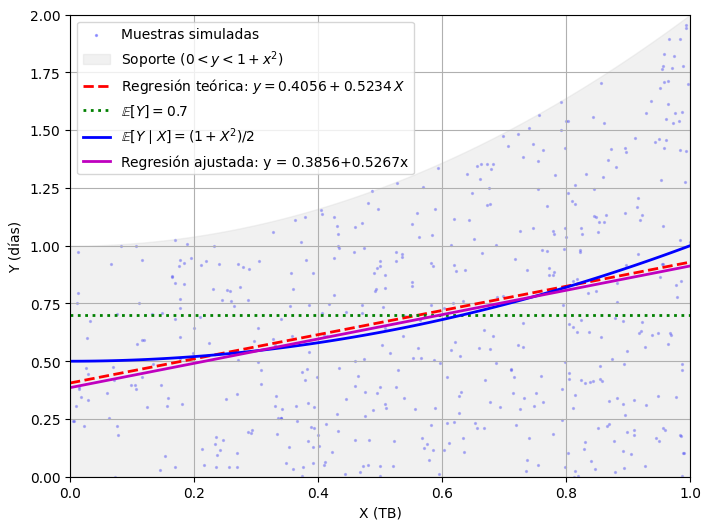

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# 1) Soporte: 0<x<1
t = np.linspace(0, 1, 100);

# 2) Puntos de datos simulados
plt.scatter(X, Y, alpha=0.3, color='blue',s=2, label="Muestras simuladas")

# 3) Soporte: rellenar bajo (1 + x^2)
plt.fill_between(t, 0, t**2+1, color='lightgray', alpha=0.3,label='Soporte $(0<y<1+x^2)$')

# 4) Recta de regresión teórica
plt.plot(t,(217/535)+(56/107)*t,'r--', lw=2, label="Regresión teórica: $y = 0.4056 + 0.5234\,X$")

# 5) Línea horizontal E[Y]
plt.axhline(0.7, color='g', linestyle=':', lw=2,label="$\mathbb{E}[Y] = 0.7 $")

# 6) Curva de la esperanza condicional
plt.plot(t,(1+t**2)/2, 'b-', lw=2,label="$\mathbb{E}[Y\mid X]=(1 + X^2)/2$")

# 7) Recta de regresión hallada con el dataset
plt.plot(t,modelo.coef_[0]+modelo.coef_[1]*t, 'm-', lw=2, label=f"Regresión ajustada: y = {modelo.coef_[0]:.4f}+{modelo.coef_[1]:.4f}x")

plt.xlabel('X (TB)')
plt.ylabel('Y (días)')
plt.grid()
plt.legend()
plt.xlim(0,1)
plt.ylim(0,2)
plt.show()

# Gradiente descendente

El método del gradiente descendente es un procedimiento iterativo para minimizar la función de costo, útil cuando n (o la dimensionalidad) es muy grande, o en problemas donde no hay solución cerrada.

Se parte de la idea de calcular el gradiente de la función de costo en el punto actual (la dirección de mayor incremento), actualizar el vector de parámetros en la dirección opuesta al gradiente, con una cierta tasa de aprendizaje $\alpha$:
$$\theta_{t+1}=\theta_{t}-\alpha \nabla J (\theta_t)$$
donde $\theta_{t}$ representa el conjunto de parámetros en la iteración $t$.

En el caso de regresión lineal con función costo de la forma:
$$J(w)=\frac{1}{n}\sum_{i = 1}^n \left(w^T X_i+b-Y-1\right)^2$$
el vector de parámetros podría ser $\theta=\left(b, w_1, w_2,\dots\right)$.

Aplicar gradiente descendiente consiste en:
- Calculal el gradiente: Si se usa la versión matricial, el gradiente se expresa como:
$$\nabla J (w) = \frac{2}{n} \mathbf{X}^T\left(\mathbf{X}\mathbf{w}-\mathbf{y}\right)$$
- Actualilar los pesos en cada iteración:
$$\mathbf{w}_{t+1}=\mathbf{w}_{t}-\alpha\cdot \nabla J (\mathbf{w}_t)$$

Este procedimiento se repite hasta que se cumplan ciertos criterios de parada (número máximo de iteraciones o cambios muy pequeños en $J$).

La tasa de aprendizaje $\alpha$ controla cuánto se modifica $\theta$ en cada iteración:
- Si es demasiado grande, el método puede divergir u oscilar sin estabilizarse.
- Si es muy pequeña, la convergencia es muy lenta, requiriéndose muchas iteraciones.

Para el caso convexo, existe un valor óptimo en ciertos casos (cuando la matriz Hessiana es constante) que equilibra la velocidad de convergencia en todas las direccones:
$$\alpha^\ast = \frac{1}{\lambda_{\max}+\lambda_{\min}}$$
siendo $\lambda_i$ los autovalores.

En el contexto particular del problema:
$$\mathbf{H}=\nabla^2 J(\mathbf{w})=\frac{2}{n}\mathbf{X}^T\mathbf{X}$$
es decir, la Hessiana no depende de $\mathbf{w}$, por lo tanto es constante y se puede aplicar el criterio para obtener la tasa de aprendizaje.

In [ ]:
import numpy as np

class gradient_descent:
    def __init__(self, lr=0.01, iter=1000, tol=1e-6):
        self.lr = lr
        self.iter = iter
        self.tol = tol
        self.coef_ = None

    def fit(self, X, y):
        # Asegurar formato y agregar columna de 1s
        y = y.reshape(-1, 1)
        X_ = np.column_stack((np.ones_like(X), X))

        # Inicializar w
        coef = np.array([[0.],[0.]])

        N = X.shape[0]

        for _ in range(self.iter):
            y_pred = X_ @ coef
            grad = (-2 / N) * X_.T @ (y - y_pred)

            # Criterio de corte: gradiente muy pequeño
            if np.linalg.norm(grad) < self.tol:
              break

            coef -= self.lr * grad

        # Convierte el array (2,1) en un vector 1D (2,)
        self.coef_ = coef.flatten()

    def predict(self, X):
        return self.coef_[0] + self.coef_[1]*X



In [ ]:
X_ = np.column_stack((np.ones_like(X), X))

# Cálcular los autovalores máximo y mínimo
eigenvalues = np.linalg.eigvalsh(X_.T @ X_)
lambda_min = np.min(eigenvalues)
lambda_max = np.max(eigenvalues)

# Cálcular la tasa de aprendizaje
lr_o = 2 / (lambda_max+lambda_min)
print(f"Autovalor mínimo: {lambda_min:.4f}, máximo: {lambda_max:.4f}, tasa: {lr_o:.6f}")



Autovalor mínimo: 28.9616, máximo: 680.2680, tasa: 0.002820


In [ ]:
# Entrenamos con gradiente descendiente
modelo_gd = gradient_descent(lr=lr_o, iter=100_000, tol=1e-6)
modelo_gd.fit(X, Y)

print(f"Parámetros con GD: Ordenada al origen= {modelo_gd.coef_[0]:.6f}, pendiente={modelo_gd.coef_[1]:.6f}")

Parámetros con GD: Ordenada al origen= 0.385610, pendiente=0.526656


In [ ]:
# Capacidad de 356 GB = 0.356 TB
x_nuevo = np.array([0.356])

# Predecir duración
y_pred = modelo_gd.predict(x_nuevo)

print(f"Predicción de duración (en días) para 356GB: {y_pred[0]:.4f} días")

Predicción de duración (en días) para 356GB: 0.5731 días
